[View in Colaboratory](https://colab.research.google.com/github/takesi0627/deeplearningclass/blob/master/Machine_Learning_Intermediate_report.ipynb)

lambda= 2
w^T= [[0.8181819 1.090909 ]]
lambda= 4
w^T= [[0.6363637  0.18181805]]
lambda= 6
w^T= [[ 0.45454547 -0.72727287]]


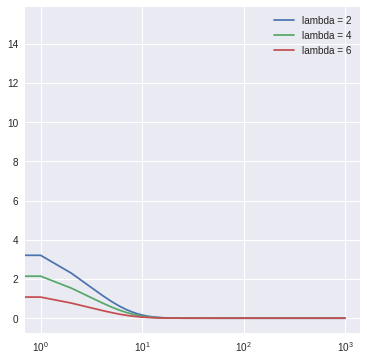

In [53]:
# Problem 2.1
import numpy as np
from matplotlib import pyplot


def grad(A, m, w, lamda):
    return np.dot(A + A.T, w) - np.dot(A, m) - np.dot(m.T, A).T + lamda


def loop(A, m, w, Lambda):
    for _itr in range(itr):
        loss[_itr] = np.linalg.norm(grad(A, m, w, Lambda))
        w = w - eta*(grad(A, m, w, Lambda))
    print('lambda= ' + str(Lambda))
    print('w^T= ' + str(w.T))
          
A = np.array([[3, 0.5], [0.5, 1]], dtype=np.float32)
m = np.array([[1], [2]], dtype=np.float32)
Lambda = 2

w = np.array([[3], [-1]], dtype=np.float32)

eta = np.max(np.linalg.eigvals(2*A)) ** -1
itr = 1000

pyplot.figure(figsize = (6, 6))

loss = np.zeros(itr)
loop(A, m, w, 2)
pyplot.semilogx(np.arange(0, itr, 1), loss, label='lambda = 2')
loop(A, m, w, 4)
pyplot.semilogx(np.arange(0, itr, 1), loss, label='lambda = 4')
loop(A, m, w, 6)
pyplot.semilogx(np.arange(0, itr, 1), loss, label='lambda = 6')


pyplot.legend()
pyplot.show()

In [0]:
# Toy Dataset
import numpy
from matplotlib import pyplot
import sys

numpy.random.seed()
N = 40
d = 2
omega = numpy.random.randn(1, 1)
X = numpy.random.randn(N, d)
Y = numpy.array([1 if (omega * x + y + 0.8 * numpy.random.randn(1,1) > 0) else - 1 for x, y in X])

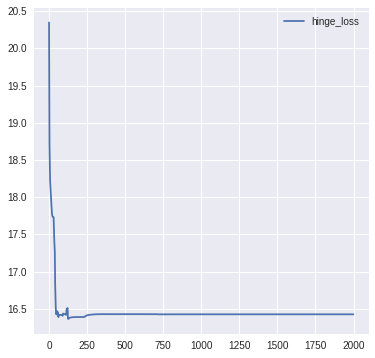

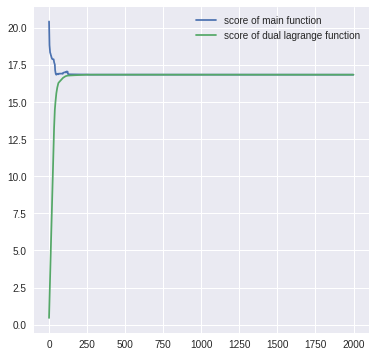

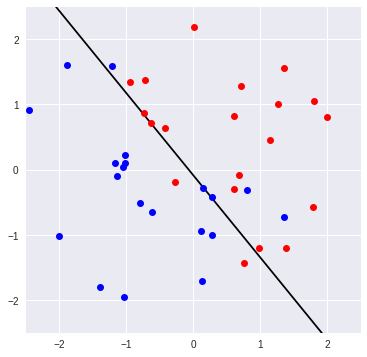

In [19]:
# Problem 3.3
alpha = numpy.zeros(N)
eta_al = 0.02 # update ratio of alpha
itr = 2000
LAMBDA = 0.1

hinges = numpy.zeros(itr)
lagrange_score = numpy.zeros(itr)
main_function_score = numpy.zeros(itr)

K = numpy.zeros((N, N))
for i in range(N):
  for j in range(N):
    K[i][j] = Y[i] * Y[j] * numpy.dot(X[i].T, X[j])

for _itr in range(itr):
    for i in range(N):
        delta = 1 - (Y[i] * X[i]).dot(alpha * Y * X.T).sum() * 1 / 2 / LAMBDA
        alpha[i] = max(0, min(1, alpha[i] + eta_al * delta))
    w = (alpha * Y).T.dot(X) * 1 / 2 / LAMBDA

    loss = 0
    for i in range(N):
        loss += max(0, 1 - Y[i] * w.T.dot(X[i]))
    hinges[_itr] = loss
    main_function_score[_itr] = loss + LAMBDA * w.T.dot(w)

    score = 0
    score += alpha.T.dot(K).dot(alpha) / -4 / LAMBDA
#     for i in range(N):
#       for j in range(N):
#         score += alpha[i] * alpha[j] * Y[i] * Y[j] * X[i].T.dot(X[j])

#     score *= -1 / 4 / LAMBDA
    score += alpha.sum()
#     score *= -1
    lagrange_score[_itr] = score
    
    
pyplot.figure(figsize = (6, 6))
pyplot.plot(numpy.arange(0, itr, 1), hinges, label='hinge_loss')
pyplot.legend()
pyplot.show()

pyplot.figure(figsize = (6, 6))
pyplot.plot(numpy.arange(0, itr, 1), main_function_score, label='score of main function')
pyplot.plot(numpy.arange(0, itr, 1), lagrange_score, label='score of dual lagrange function')
pyplot.legend()
pyplot.show()    

index = alpha > 0
w = (alpha * Y).T.dot(X) * 1 / 2 / LAMBDA
b = (Y[index] - X[index].dot(w)).mean()

seq = numpy.arange(-2.5, 2.5, 0.02)
pyplot.figure(figsize = (6, 6))
pyplot.xlim(-2.5, 2.5)
pyplot.ylim(-2.5, 2.5)
pyplot.plot(seq, -(w[0] * seq + b) / w[1], 'k-')
pyplot.plot(X[Y ==  1,0], X[Y ==  1,1], 'ro')
pyplot.plot(X[Y == -1,0], X[Y == -1,1], 'bo')
pyplot.show()

